This notebook will be used to develop the machine learning model that will predict the severity of car accidents

In [3]:
import pandas as pd
import numpy as np

In [6]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [4]:
path=r'Data-Collisions (1).csv'
df_or=pd.read_csv(path)
print("data read succesfully!")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data read succesfully!


In [5]:
df_or.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df_1=df_or[['ADDRTYPE','COLLISIONTYPE','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]

In [7]:
df_1.head()

,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Intersection,Angles,2,Overcast,Wet,Daylight,NaN,2
1,Block,Sideswipe,2,Raining,Wet,Dark - Street Lights On,NaN,1
2,Block,Parked Car,3,Overcast,Dry,Daylight,NaN,1
3,Block,Other,3,Clear,Dry,Daylight,NaN,1
4,Intersection,Angles,2,Raining,Wet,Daylight,NaN,2


In [8]:
df_2=df_1[df_1['SPEEDING']!='Y']

In [9]:
df_2['SPEEDING'].count()

0

In [10]:
df=df_2.drop('SPEEDING',axis=1)
df.head()

,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Intersection,Angles,2,Overcast,Wet,Daylight,2
1,Block,Sideswipe,2,Raining,Wet,Dark - Street Lights On,1
2,Block,Parked Car,3,Overcast,Dry,Daylight,1
3,Block,Other,3,Clear,Dry,Daylight,1
4,Intersection,Angles,2,Raining,Wet,Daylight,2


In [11]:
df['LIGHTCOND'].value_counts()

Daylight                    111632
Dark - Street Lights On      44476
Unknown                      13381
Dusk                          5628
Dawn                          2310
Dark - No Street Lights       1410
Dark - Street Lights Off      1112
Other                          215
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [12]:
df['LIGHTCOND'].replace('Daylight', 'Light', inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights On', 'Light', inplace=True)
df['LIGHTCOND'].replace('Dusk', 'Light', inplace=True)
df['LIGHTCOND'].replace('Dawn', 'Light', inplace=True)
df['LIGHTCOND'].replace('Dark - No Street Lights', 'Dark', inplace=True)
df['LIGHTCOND'].replace('Dark - Street Lights Off', 'Dark', inplace=True)

In [13]:
#df = df.drop(df[(df['LIGHTCOND'] != 'Light' ) & (df['LIGHTCOND'] != 'Dark')].index)
df=df[(df['LIGHTCOND'] == 'Light' ) | (df['LIGHTCOND'] == 'Dark')]
df.head()

,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Intersection,Angles,2,Overcast,Wet,Light,2
1,Block,Sideswipe,2,Raining,Wet,Light,1
2,Block,Parked Car,3,Overcast,Dry,Light,1
3,Block,Other,3,Clear,Dry,Light,1
4,Intersection,Angles,2,Raining,Wet,Light,2


In [14]:
df['LIGHTCOND'].value_counts()

Light    164046
Dark       2522
Name: LIGHTCOND, dtype: int64

In [15]:
df['ROADCOND'].value_counts()

Dry               118067
Wet                42377
Unknown             4343
Ice                  795
Snow/Slush           663
Other                 87
Standing Water        70
Oil                   60
Sand/Mud/Dirt         58
Name: ROADCOND, dtype: int64

In [16]:
df=df[(df['ROADCOND'] == 'Dry' ) | (df['ROADCOND'] == 'Wet') | (df['ROADCOND'] == 'Snow/Slush')| (df['ROADCOND'] == 'Ice')]
df['ROADCOND'].value_counts()

Dry           118067
Wet            42377
Ice              795
Snow/Slush       663
Name: ROADCOND, dtype: int64

In [17]:
df['WEATHER'].value_counts()

Clear                       104709
Raining                      29306
Overcast                     25367
Unknown                        902
Snowing                        642
Fog/Smog/Smoke                 505
Other                          227
Sleet/Hail/Freezing Rain        84
Blowing Sand/Dirt               43
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [18]:
df['WEATHER'].replace('Overcast', 'Clear', inplace=True)
df['WEATHER'].replace('Severe Crosswind', 'Clear', inplace=True)
df['WEATHER'].replace('Partly Cloudy', 'Clear', inplace=True)
df['WEATHER'].replace('Raining', 'Not Clear', inplace=True)
df['WEATHER'].replace('Snowing', 'Not Clear', inplace=True)
df['WEATHER'].replace('Fog/Smog/Smoke', 'Not Clear', inplace=True)
df['WEATHER'].replace('Sleet/Hail/Freezing Rain', 'Not Clear', inplace=True)
df['WEATHER'].replace('Blowing Sand/Dirt', 'Not Clear', inplace=True)

In [19]:
df=df[(df['WEATHER']=='Clear') | (df['WEATHER']=='Not Clear')]
df['WEATHER'].value_counts()

Clear        130105
Not Clear     30580
Name: WEATHER, dtype: int64

In [20]:
df_col=df.groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts().unstack()

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='COLLISIONTYPE'>

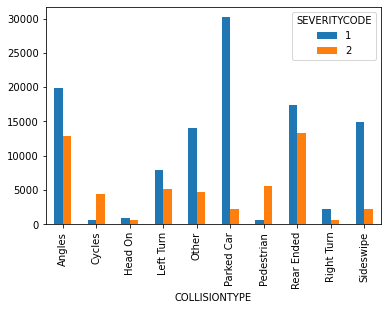

In [22]:
df_col.plot(kind='bar')

In [23]:
df['COLLISIONTYPE'].replace('Pedestrian', 'High', inplace=True)
df['COLLISIONTYPE'].replace('Cycles', 'High', inplace=True)
df['COLLISIONTYPE'].replace('Sideswipe', 'Low', inplace=True)
df['COLLISIONTYPE'].replace('Right Turn', 'Low', inplace=True)
df['COLLISIONTYPE'].replace('Parked Car', 'Low', inplace=True)
df['COLLISIONTYPE'].replace('Other', 'Low', inplace=True)
df['COLLISIONTYPE'].replace('Angles', 'Medium', inplace=True)
df['COLLISIONTYPE'].replace('Head On', 'Medium', inplace=True)
df['COLLISIONTYPE'].replace('Rear Ended', 'Medium', inplace=True)
df['COLLISIONTYPE'].replace('Left Turn', 'Medium', inplace=True)

In [24]:
df['COLLISIONTYPE'].value_counts()

Medium    78136
Low       71159
High      11374
Name: COLLISIONTYPE, dtype: int64

In [25]:
df['ADDRTYPE'].value_counts()

Block           100169
Intersection     59302
Alley              556
Name: ADDRTYPE, dtype: int64

In [26]:
df_veh=df.groupby('VEHCOUNT')['SEVERITYCODE'].value_counts().unstack()
df_veh['Total']=df_veh.sum(axis=1)
df_veh['% of 1']=df_veh[1]/df_veh['Total']
df_veh['% of 2']=df_veh[2]/df_veh['Total']
df_veh=df_veh['% of 1']
df_veh.head()

VEHCOUNT
0    0.016304
1    0.410600
2    0.733201
3    0.573762
4    0.558485
Name: % of 1, dtype: float64

Text(0.5, 1.0, 'Percentage of Severity type vs Vehicle Count')

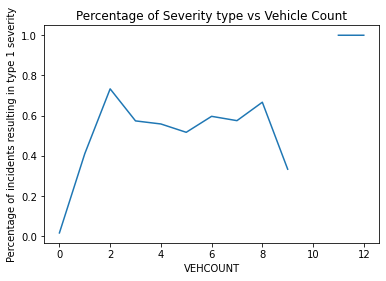

In [27]:
df_veh.plot(kind='line')
plt.ylabel('Percentage of incidents resulting in type 1 severity')
plt.title('Percentage of Severity type vs Vehicle Count')

In [28]:
df['VEHCOUNT'].value_counts()

2     125053
1      21169
3      11571
4       2086
5        441
0        184
6        114
7         40
8         12
9          9
11         3
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df=df.reset_index()

In [31]:
df.dropna(inplace=True)

In [32]:
x_knn=df[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]

In [33]:
y_knn=df['SEVERITYCODE'].values

In [34]:
x_knn['LIGHTCOND'].replace(to_replace=['Light','Dark'], value=[0,1], inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [35]:
x_knn['WEATHER'].replace(to_replace=['Clear','Not Clear'], value=[0,1], inplace=True)

In [36]:
x_knn['COLLISIONTYPE'].replace(to_replace=['Low','Medium', 'High'], value=[1,2,3], inplace=True)

In [37]:
x_knn=pd.concat([x_knn,pd.get_dummies(x_knn[['ADDRTYPE','ROADCOND']])], axis=1)
x_knn.head()

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Snow/Slush,ROADCOND_Wet
0,Intersection,2,0,Wet,0,0,0,1,0,0,0,1
1,Block,1,1,Wet,0,0,1,0,0,0,0,1
2,Block,1,0,Dry,0,0,1,0,1,0,0,0
3,Block,1,0,Dry,0,0,1,0,1,0,0,0
4,Intersection,2,1,Wet,0,0,0,1,0,0,0,1


In [38]:
x_knn.drop(['ADDRTYPE','ROADCOND'], axis=1, inplace=True)

In [39]:
x_knn.head()

,COLLISIONTYPE,WEATHER,LIGHTCOND,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Snow/Slush,ROADCOND_Wet
0,2,0,0,0,0,1,0,0,0,1
1,1,1,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0,0
4,2,1,0,0,0,1,0,0,0,1


In [40]:
x_train, x_test, y_train, y_test=train_test_split(x_knn,y_knn,test_size=.3,random_state=0)

In [41]:
x_train.isnull().sum()

COLLISIONTYPE            0
WEATHER                  0
LIGHTCOND                0
ADDRTYPE_Alley           0
ADDRTYPE_Block           0
ADDRTYPE_Intersection    0
ROADCOND_Dry             0
ROADCOND_Ice             0
ROADCOND_Snow/Slush      0
ROADCOND_Wet             0
dtype: int64

In [42]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KN

In [43]:
scores=[]
kf=[]
Results=pd.DataFrame()

k=1
#for k in range(1,11):
#Build Model
neigh=KN(n_neighbors=k).fit(x_train,y_train)
#Evaluate Model
y_hat=neigh.predict(x_test)
test_score=metrics.accuracy_score(y_test, y_hat)
scores.append(test_score)
#kf.append(k)
scores

#Select K with greatest accuracy
#Results['Accuracy Score']=scores
#Results['k']=kf
#df_knn.head()
#df_max=df[df['Test_Score']==df['Test_Score'].max()]

#plt.plot(df['k'], df['Test_Score'])
#plt.show()
#print(df_max)

[0.672839763353054]

In [44]:
from sklearn.metrics import jaccard_similarity_score
j=jaccard_similarity_score(y_test, y_hat)
j

0.672839763353054

In [45]:
y_log_train=np.where(y_train==1, 0, 1)
y_log_test=np.where(y_test==1, 0, 1)

In [46]:
from sklearn.linear_model import LogisticRegression as LR
LogR=LR(C=.01, solver='liblinear').fit(x_train,y_log_train)
y_hat_log=LogR.predict(x_test)
test_score=metrics.accuracy_score(y_log_test, y_hat_log)
scores.append(test_score)

In [246]:
scores

[0.672839763353054, 0.7323973002249813]

In [47]:
from sklearn.metrics import jaccard_similarity_score
j=jaccard_similarity_score(y_log_test, y_hat_log)
j

0.7323973002249813

In [48]:
x_dtree=df[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
y_dtree=df['SEVERITYCODE'].values

In [49]:
x_dtree['LIGHTCOND'].replace(to_replace=['Light','Dark'], value=[0,1], inplace=True)
x_dtree['WEATHER'].replace(to_replace=['Clear','Not Clear'], value=[0,1], inplace=True)
x_dtree['COLLISIONTYPE'].replace(to_replace=['Low','Medium', 'High'], value=[1,2,3], inplace=True)
x_dtree['ADDRTYPE'].replace(to_replace=['Intersection','Block', 'Alley'], value=[1,2,3], inplace=True)
x_dtree['ROADCOND'].replace(to_replace=['Dry','Wet', 'Snow/Slush', 'Ice'], value=[1,2,3,4], inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
x_train_dtree, x_test_dtree, y_train_dtree, y_test_dtree=train_test_split(x_dtree,y_dtree,test_size=.3,random_state=0)

In [51]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtree=DTC(criterion='entropy')
dtree.fit(x_train_dtree,y_train_dtree)
y_hat_dtree=dtree.predict(x_test_dtree)
score=metrics.accuracy_score(y_test_dtree, y_hat_dtree)
scores.append(score)
scores

[0.672839763353054, 0.7323973002249813, 0.7328347637696858]

In [52]:
from sklearn.svm import SVC

#score=[]
#type=[]
#df_svc=pd.DataFrame()
#sv_type=['rbf', 'linear', 'sigmoid', 'poly']

t='linear'
#for i in sv_type:
sv=SVC(kernel=t)
sv.fit(x_train,y_train)
y_hat_svm=sv.predict(x_test)
acc=metrics.accuracy_score(y_test, y_hat_svm)
scores.append(acc)
#type.append(i)
#df_svc['SVC_Type']=type
#df_svc['Score']=score
#df_svc.head()
scores

[0.672839763353054, 0.7323973002249813, 0.7328347637696858, 0.702087326056162]

In [65]:
Results['Model Type']=['KNN', 'Logistic Regression', 'Decision Tree', 'SVM']
Results['Accuracy Score']=scores
Results=Results[['Model Type', 'Accuracy Score']]
Results

,Model Type,Accuracy Score
0,KNN,0.672840
1,Logistic Regression,0.732397
2,Decision Tree,0.732835
3,SVM,0.702087
